## Importing Libraries

In [4]:
import sys
import numpy as np
import pandas as pd
from skimage.io import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from keras.models import Model
from keras.preprocessing import image

from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

## Making Folders and Setting Directories

In [5]:
DATA_PATH= os.path.join('data/')
TRAIN_PATH=os.path.join(DATA_PATH,'train')
VAL_PATH=os.path.join(DATA_PATH,'validation')
SAV_PATH=os.path.join(DATA_PATH, 'resized-data')

In [6]:
# os.makedirs(TRAIN_PATH)
# os.makedirs(VAL_PATH)
# os.makedirs(SAV_PATH)

In [7]:
print (os.listdir(TRAIN_PATH))

['donkey', 'jellyfish', 'antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper']


In [8]:
print (os.listdir(VAL_PATH))

['seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


## Loading the training and validation datasets

In [9]:
for directory in os.listdir(TRAIN_PATH):
    file= os.listdir(os.path.join(TRAIN_PATH,directory))[0]   #first picture of every folder. Folders and files are loaded in random order.
    img=cv2.imread(os.path.join(TRAIN_PATH,directory,file))
#     print(f'File: {file}, Size: {img.shape} Feature: {img.flatten()}')

In [10]:
def loadimgs(path, n=0):
    '''path=> Path of the train or test directory'''
    X=[]
    y=[]
    cat_dict={}
    curr_y = n
    # We load every animal separately so we can isolate them later
    for animal in os.listdir(path):
#         print("Loading animal:", animal)
        cat_dict[animal]=(curr_y)
        category_images=[]
        animal_image_path=os.path.join(path,animal)
        for filename in os.listdir(animal_image_path):
            image_path=os.path.join(animal_image_path, filename)  #extract one imgae(filename) of a category(animal) iteratively
            image=cv2.imread(image_path)
            resized=cv2.resize(image, (128,128),interpolation=cv2.INTER_AREA)
            rescaled=1.0/255*resized
            category_images.append(rescaled)
            y.append(curr_y)
        try:
            X.append(np.stack(category_images))
        except ValueError as e:
            print(e)
            print("Error-Category_images:", category_images)
        curr_y+=1
    y=np.vstack(y)
    X=np.stack(X)
    print("Loading Complete")
    return X,y,cat_dict

In [11]:
X,y,c=loadimgs(TRAIN_PATH)

Loading Complete


In [12]:
with open(os.path.join(SAV_PATH,"train.pickle"),"wb") as f:
    pickle.dump((X,c),f)

In [13]:
X.shape
# 72 categories of animal, each containg 60 images and of dimensions 128*128*3

(72, 60, 128, 128, 3)

In [14]:
y.shape #72 0s and 72 1s and so on.

(4320, 1)

In [15]:
c.keys()

dict_keys(['donkey', 'jellyfish', 'antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper'])

In [16]:
c


{'donkey': 0,
 'jellyfish': 1,
 'antelope': 2,
 'badger': 3,
 'bat': 4,
 'bear': 5,
 'bee': 6,
 'beetle': 7,
 'bison': 8,
 'boar': 9,
 'butterfly': 10,
 'cat': 11,
 'caterpillar': 12,
 'chimpanzee': 13,
 'cockroach': 14,
 'cow': 15,
 'coyote': 16,
 'crab': 17,
 'crow': 18,
 'deer': 19,
 'dog': 20,
 'dolphin': 21,
 'dragonfly': 22,
 'duck': 23,
 'eagle': 24,
 'elephant': 25,
 'flamingo': 26,
 'fly': 27,
 'fox': 28,
 'goat': 29,
 'goldfish': 30,
 'goose': 31,
 'gorilla': 32,
 'grasshopper': 33,
 'hamster': 34,
 'hare': 35,
 'hedgehog': 36,
 'hippopotamus': 37,
 'hornbill': 38,
 'horse': 39,
 'hummingbird': 40,
 'hyena': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45,
 'lion': 46,
 'lizard': 47,
 'lobster': 48,
 'mosquito': 49,
 'moth': 50,
 'mouse': 51,
 'octopus': 52,
 'okapi': 53,
 'orangutan': 54,
 'otter': 55,
 'owl': 56,
 'ox': 57,
 'oyster': 58,
 'panda': 59,
 'parrot': 60,
 'pelecaniformes': 61,
 'penguin': 62,
 'pig': 63,
 'pigeon': 64,
 'porcupine': 65,
 'pos

In [17]:
Xval, yval,cval=loadimgs(VAL_PATH)

Loading Complete


In [18]:
with open(os.path.join(SAV_PATH,"val.pickle"),"wb") as f:
    pickle.dump((Xval,cval),f)

In [19]:
Xval.shape

(18, 60, 128, 128, 3)

In [20]:
yval.shape

(1080, 1)

In [21]:
# cval.keys()

## Loading the saved pickle data

In [22]:
with open(os.path.join(SAV_PATH, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
    
print("Training data classes: \n")
# print(list(train_classes.keys()))

Training data classes: 



In [23]:
with open(os.path.join(SAV_PATH, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Validation data classes:", end="\n\n")
# print(list(val_classes.keys()))

Validation data classes:



In [24]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape[0], X.shape[1], X.shape[2], X.shape[3]

    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,3)) for i in range(2)]  #each pixel's rgb value for all pixels for batch_size images in one array. two of these arrays
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))   # [0,0,0, ... for batch_size times]
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 3)
        idx_2 = rng.randint(0, n_examples)
        
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category
            while idx_1 == idx_2:
                idx_2 = rng.randint(0, n_examples)     #two same image must not be selected.
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,3)
    
    return pairs, targets

In [25]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [26]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape[0], X.shape[1], X.shape[2], X.shape[3]
    
    indices = rng.randint(0, n_examples,size=(N,))
    categories = rng.choice(n_classes,size=(N,),replace=False)
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))

    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,3)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,3)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]
    print(targets)

    return pairs, targets

In [27]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w = X.shape[0], X.shape[1], X.shape[2]
    X = X.reshape(nc, h, w,3)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h,3))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [28]:
def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(128,128,3))
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


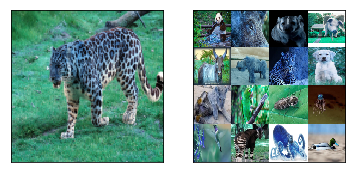

In [29]:
pairs, targets = make_oneshot_task(16,"train")
plot_oneshot_task(pairs)

## Siamese Model

In [30]:
def initialize_weights(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [31]:
def initialize_bias(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [32]:
def euclidean_distance(vectors):
    # unpack the vectors into separate lists
    (featsA, featsB) = vectors
    
    # compute the sum of squared distances between the vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1,
        keepdims=True)
    
#     squareRoot = K.sqrt(K.maximum(sumSquared, K.epsilon()))       # return the euclidean distance between the vectors
#     value = 1 - squareRoot
    
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))
#     return value

In [33]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape,
                    kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(256, activation='sigmoid',kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='sigmoid',kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the euclidian difference between the encodings
    L1_layer = Lambda(lambda tensors: euclidean_distance((tensors[0],tensors[1])))
    
#     L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    print("HERE:")
    print(L1_distance)
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [34]:
model = get_siamese_model((128, 128, 3))
model.summary()

2022-05-05 20:45:06.089111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 20:45:06.091194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/salina/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-05 20:45:06.091573: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/salina/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-05 20:45:06.091796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

HERE:
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda/Sqrt:0', description="created by layer 'lambda'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 64)  

In [35]:
def contrastive_loss(y, preds, margin=1):
    # explicitly cast the true class label data type to the predicted
    # class label data type (otherwise we run the risk of having two
    # separate data types, causing TensorFlow to error out)
    y = tf.cast(y, preds.dtype)
    # calculate the contrastive loss between the true labels and
    # the predicted labels
    squaredPreds = K.square(preds)
    squaredMargin = K.square(K.maximum(margin - preds, 0))
    loss = K.mean(y * squaredPreds + (1 - y) * squaredMargin)
    # return the computed contrastive loss to the calling function
    return loss


In [36]:
optimizer = Adam(learning_rate = 0.001)
model.compile(loss=contrastive_loss,optimizer=optimizer, metrics = ['accuracy'])

In [37]:
model_path = './weights/'
# os.makedirs(model_path)

In [38]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
#         print("INPUTS")
#         print(inputs)
        print(len(inputs))

        predict_pair = [inputs[0],inputs[1]]
        probs = model.predict(predict_pair)


# CHANGED
#         probs = []
#         for j in range(len(inputs[0])):
#             predict_pair = [inputs[0][j],inputs[1][j]]
# #             predict_pair_list = predict_pair.tolist()
#             individual_prediction = model.predict_on_batch(predict_pair)
# #             predict_pair = np.array((inputs[0][j],inputs[1][j]))
# #             predict_pair_list = predict_pair.tolist()
# #             part_1 = predict_pair_list[0]
# #             part_2 = predict_pair_list[1]
# #             predict_pair = [input_2[0][j],input_2[1][j]]
# #             print(predict_pair)
# #             individual_prediction = model.predict(part_1,part_2)
#             probs.append(individual_prediction)

        print("PROBS")
        print(len(probs))
        print("MAX of probs")
        print(np.argmax(probs))
        print("MAX of target")
        print(np.argmax(targets))
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [39]:
# Hyper parameters
evaluate_every = 200 # interval for evaluating on one-shot tasks
batch_size = 32
n_iter = 20000 # No. of training iterations
N_way = 18 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

# SKIP

In [40]:
(input_2,target_2) = make_oneshot_task(18)
print(len(input_2))
probs = []
for j in range(len(input_2[0])):
#     print(len(input_2[0][j]))
#     print(len(input_2[1][j]))
#     print(input_2[0][j])
#     predict_pair = np.array((input_2[0][j],input_2[1][j]))
#     print(predict_pair.size)
#     probs.append(individual_prediction)
    predict_pair = [input_2[0],input_2[0]]
    print("_____________________")
    print("The size is:")
    print(len(predict_pair))
    print(len(predict_pair[0]))
    print(len(predict_pair[0][0]))
#     print(len(predict_pair[0][0][0]))
    print("_____________________")

# print(predict_pair)
# print(len(predict_pair))
# print(len(predict_pair[0]))
# print(len(predict_pair[0][0]))
# print(len(predict_pair[0][0][0]))
input_2[0], input_2[1], target_2 = shuffle(input_2[0],input_2[1], target_2)

# print(input_2)
print(target_2)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
2
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
_____________________
The size is:
2
18
128
_____________________
__________________

In [41]:
(input_1,target_1) = get_batch(batch_size)
print(input_1)
print("______________")
print("______________")
print(len(input_1))
print(input_1[0][0])
print(target_1)

[array([[[[0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         ...,
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843]],

        [[0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         ...,
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843]],

        [[0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         ...,
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843]],

        ...,

        [[0.01568627, 0.83137255, 0.99607843],
         [0.01568627, 0.83137255, 0.99607843

# Continue

In [ ]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    for j in range(50):
        (inputs,targets) = get_batch(72)
#         print(targets)
#     input_pairs = [inputs[0], inputs[1]]
#     print(targets)
#     for i in range(72):
#         print("FIRST")
#         plt.imshow(inputs[0][i])
#         plt.show()
#         plt.imshow(inputs[1][i])
#         plt.show()
#         print("NEXT")
        loss = model.train_on_batch(inputs, targets)
    print("GET BATCH")
    print(loss)
    
    print("MAKE ONESHOT TASK")

    (input1,target1) = make_oneshot_task(30, s = "train")
    pair_1 = [input1[0],input1[1]]
    probs = model.train_on_batch(pair_1, target1)
#     print(target1)
    print(probs)
    
    print("\nOne iteration done\n")
    
    
    if (i % 20 == 0):
        print(i)

In [ ]:
inputs, targets = make_oneshot_task(18,100)
print(len(inputs))

predict_pair = [inputs[0],inputs[1]]

score = model.evaluate(predict_pair, targets)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
image_1 = cv2.imread('data/test/1/dog_1.jpg')
image_2 = cv2.imread('data/test/1/squirrel_1.jpg')
#     break 
    
window_name = 'image'
#     print(f'File: {file_1}, Size: {image_1.shape}')
cv2.imshow(window_name, image_2)
cv2.waitKey(0)
cv2.destroyAllWindows()
  


#waits for user to press any key.
# (this is necessary to avoid Python kernel form crashing)

    
# for i in range(72):
# #         print("FIRST")
# #         plt.imshow(inputs[0][i])
# #         plt.show()
# #         plt.imshow(inputs[1][i])
# #         plt.show()
# #         print("NEXT")


In [ ]:
resized3=cv2.resize(image_1, (128,128),interpolation=cv2.INTER_AREA)
rescaled3=1.0/255*resized3
r1 = np.array((rescaled))

resized2=cv2.resize(image_2, (128,128),interpolation=cv2.INTER_AREA)
rescaled2=1.0/255*resized2
r2 = np.array((rescaled2))

print(r1.shape)
print(type(rescaled2))
print(r2.shape)
# pairs1 = np.array((r1,r2))
# pairs1_l = pairs1.tolist()
# score = model.predict(pairs1_l[0],pairs1_l[1])

paired = np.array((rescaled3,rescaled2))
score = model.predict([paired[0].tolist(),paired[1].tolist()])

In [ ]:
inputs, targets = make_oneshot_task(18,200)
print(len(inputs[0]))

predict_pair = [inputs[0],inputs[1]]

score = model.predict(inputs)
print('Test loss:', score[0][0])
print('Test accuracy:', score[1][0])
print(score)

In [ ]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

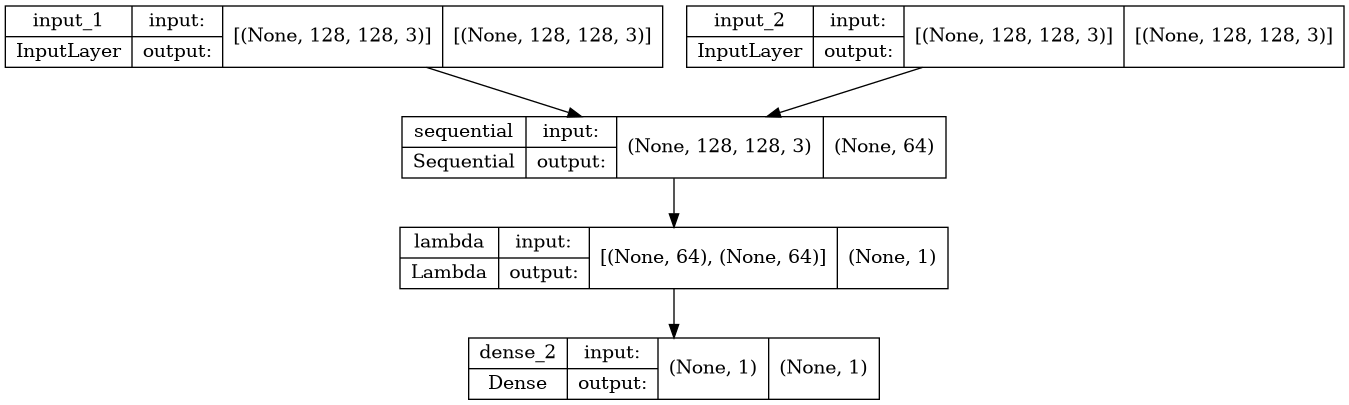

In [52]:
dot_img_file2 = '/tmp/model_2.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file2, show_shapes=True)

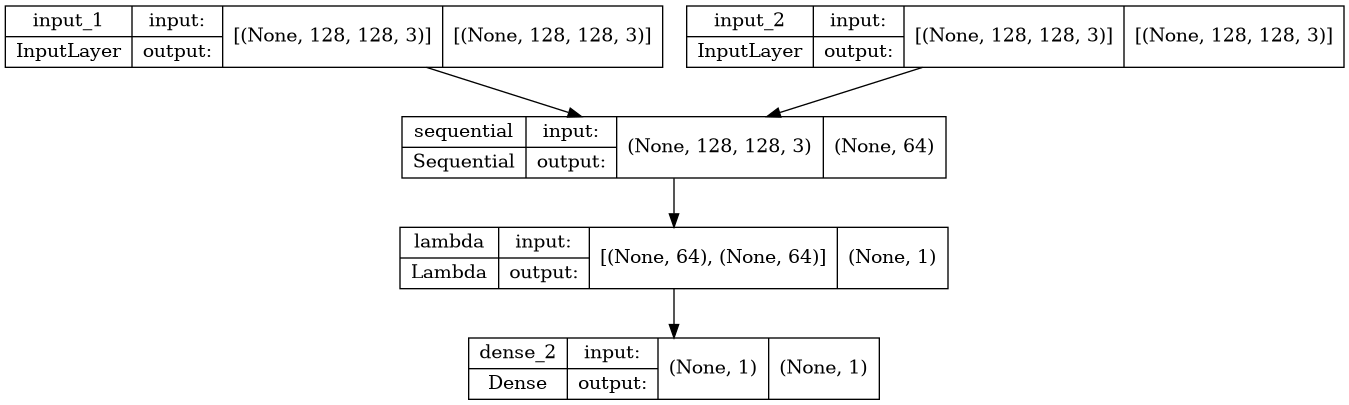

In [47]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

# TRY

In [ ]:
# print("Starting training process using model.fit!")
# print("-------------------------------------")
# t_start = time.time()
# (inputs,targets) = get_batch(batch_size)
# model.fit(inputs, targets, batch_size = 60, epochs = 70,)
# print("\n ------------- \n")
# print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
# print("Train Loss: {0}".format(loss)) 
# val_acc = test_oneshot(model, N_way, n_val, verbose=True)
# model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
# if val_acc >= best:
#     print("Current best: {0}, previous best: {1}".format(val_acc, best))
#     best = val_acc
# for i in range(1, n_iter+1):
#     (inputs,targets) = get_batch(batch_size)
#     loss = model.train_on_batch(inputs, targets)
#     if i % evaluate_every == 0:
#         print("\n ------------- \n")
#         print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
#         print("Train Loss: {0}".format(loss)) 
#         val_acc = test_oneshot(model, N_way, n_val, verbose=True)
#         model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
#         if val_acc >= best:
#             print("Current best: {0}, previous best: {1}".format(val_acc, best))
#             best = val_acc